# Linear Regression


In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
#special describe method by SciKit
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

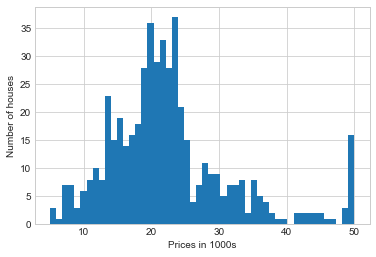

In [7]:
#Histogram of prices
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in 1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

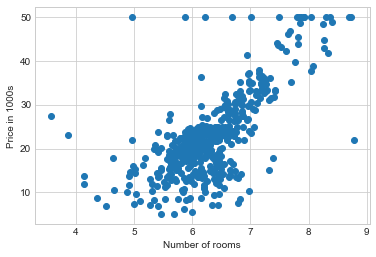

In [12]:
#Scatter plot of one single feature vs target
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in 1000s')
plt.xlabel('Number of rooms')

In [15]:
#Reset the data as dataframe to use pandas
boston_df = DataFrame(boston.data)
boston_df.columns=boston.feature_names

#Add the tartet Price to the dataframe
boston_df['Price']=boston.target

In [16]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


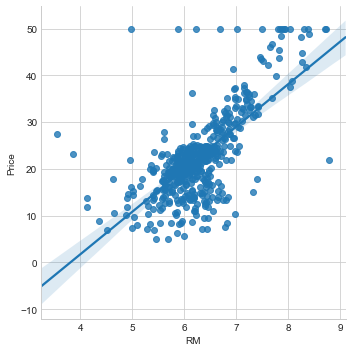

In [17]:
#linear regression
sns.lmplot('RM','Price',data=boston_df)

### Simple Regression

In [19]:
X = boston_df.RM

In [22]:
X.shape

(506,)

In [23]:
#get correct shape for our analysis
X = np.vstack(boston_df.RM)

In [24]:
X.shape

(506, 1)

In [25]:
Y = boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation: $$y=mx+b$$ which we can rewrite using matrices: $$y=Ap$$ where: $$A = \begin{bmatrix}x &amp; 1\end{bmatrix}$$ and $$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [26]:
#Create an array in a form [X 1]
X = np.array( [ [value,1] for value in X ] )

In [27]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [28]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

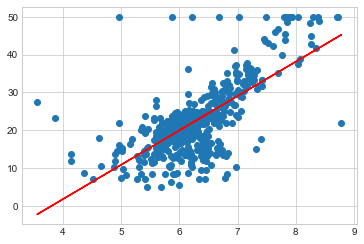

In [30]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM
plt.plot(x, m*x + b, 'r',label='best fit line')

In [31]:
# Getting the error
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


# Multivariate regression

In [32]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
# Create a linear regression object
lreg=LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it here

In [34]:
# Start regression analysis
# SEt the explanatory variables and outcome

X_multi=boston_df.drop('Price',1)
Y_target=boston_df.Price

In [35]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)


 The estimated intercept coefficient is 36.49 


In [37]:
#Get the coefficients and their p-values
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [38]:
# Now do the same with StatsModels to get detailed statistics for the model

In [39]:
import statsmodels.api as sm

C:\Users\Vardan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
mod = sm.OLS(Y_target, X_multi)

In [42]:
res = mod.fit()

In [43]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Thu, 01 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:43:48   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.0

## Training and Validation

In [54]:
#Use SciKit command to split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi,boston_df.Price,test_size=0.1)

In [55]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 13) (51, 13) (455,) (51,)


In [67]:
#Predicting using training set
np.vstack(Y_train)
np.vstack(Y_test)
mod = sm.OLS(Y_train, X_train)
res = mod.fit()

In [72]:
pred_train = res.predict(X_train)
pred_test = res.predict(X_test)

In [73]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 24.30
Fit a model X_train, and calculate MSE with X_test and Y_test: 23.61


In [74]:
#quite a good model give MSE are quite close


## Residual plot

Text(0.5,1,'Residual Plots')

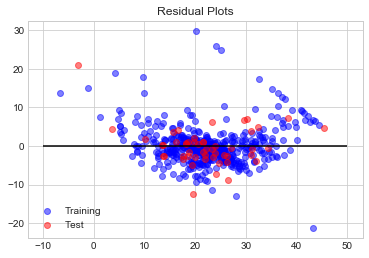

In [75]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [ ]:
# check the problem of errors distributed with a pattern (wages)?